<b>Шаг 1. Создаем датафрейм на основе 'games.csv'</b>

In [153]:
import pandas as pd
import numpy as np

df = pd.read_csv('games.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<b>Шаг 2. Подготовка данных</b>

<li>Приведение к нижнему регистру названия столбцов</li>

In [154]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<li>Преобразуйте данные в нужные типы</li>



In [155]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN)
df['user_score'] = df['user_score'].astype('float')
df.head(5)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


В 'user_score' был тип object, хотя является численным показателем. Помимо этого, встречались строки 'tbd' (To Be Determinded), заменил на NaN и привел общие данные к типу float

<li>Обработайте пропуски при необходимости</li>

In [156]:
df['genre'] = df['genre'].fillna('undefinded')
df['critic_score'] = df['critic_score'].fillna(-1)
df['user_score'] = df['user_score'].fillna(-1)

Для 'genre' на местах пропусков поставил "Не опеределен", чтобы было более понятно, с точки зрения пользователя.

Для 'critic_score' и 'user_score' поставил пропуски заполнил -1, давая понять, что оценок либо не хватает, либо они просто не выставлены.

Для остальных столбцов('year_of_release', 'rating') думаю, смысла что-то придумывать не имеет. Их пропуски говорят сами за себя.  
<hr>

Из причин, 'genre', вероятно, не был указан в связи с довольно старой датой выпуска игры, или её непопулярностью. То же самое можно сказать и про 'rating', и про 'year_of_release'. От сюда и вытекает 'critic_score' и 'user_score', оценок может попросту нехватать для отображения.

<li>Посчитать суммарные продажи во всех регионах

In [157]:
df['sales_total'] = 0

df['sales_total'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,NaN,0.01


<b>Шаг 3. Исследовательский анализ данных</b>

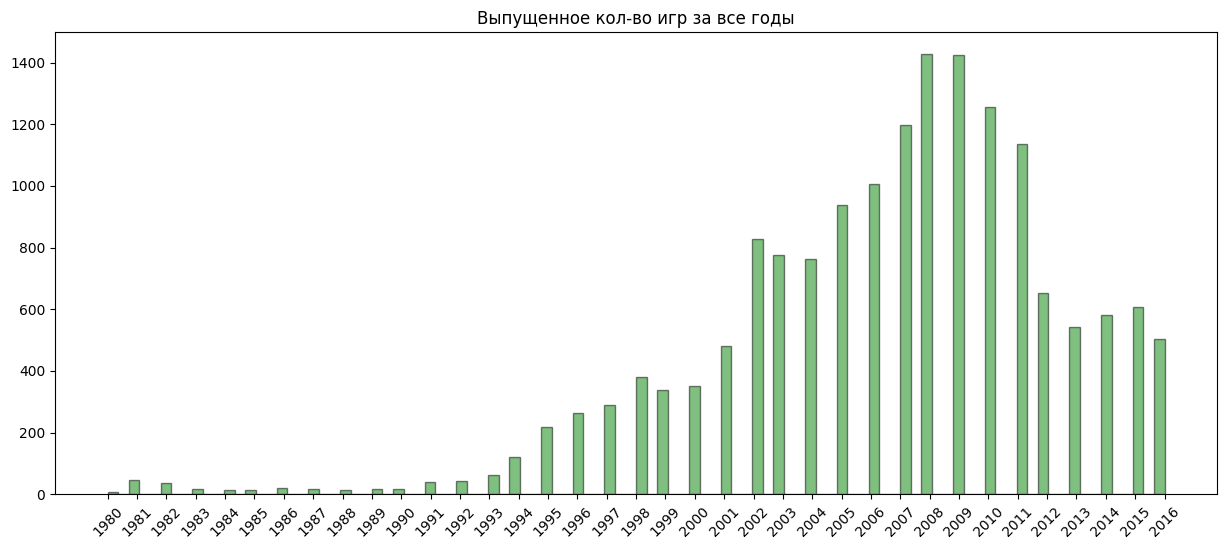

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
plt.hist(df['year_of_release'], bins=100, color='green', alpha=0.5, align='mid', edgecolor='black', linewidth=1)
plt.title('Выпущенное кол-во игр за все годы')
plt.xticks(df['year_of_release'][pd.notna(df['year_of_release'])].unique(), rotation=45)
plt.show()

До 1994 года игры практически отсутствовали, особенно на фоне первого поколения процессоров Pentium. Однако всё изменилось с появлением новых технологий — сначала на операционной системе MS-DOS, затем на Windows. Значительный рост выпуска игр произошел в 2002 году, достигнув своего пика в 2008-2009 годах. Однако с течением времени интерес к играм снизился, вызванный развитием мобильных устройств и внедрением социальных сетей в повседневную жизнь. Это привело к уменьшению производства игр, отметив начало нового этапа в индустрии развлечений.

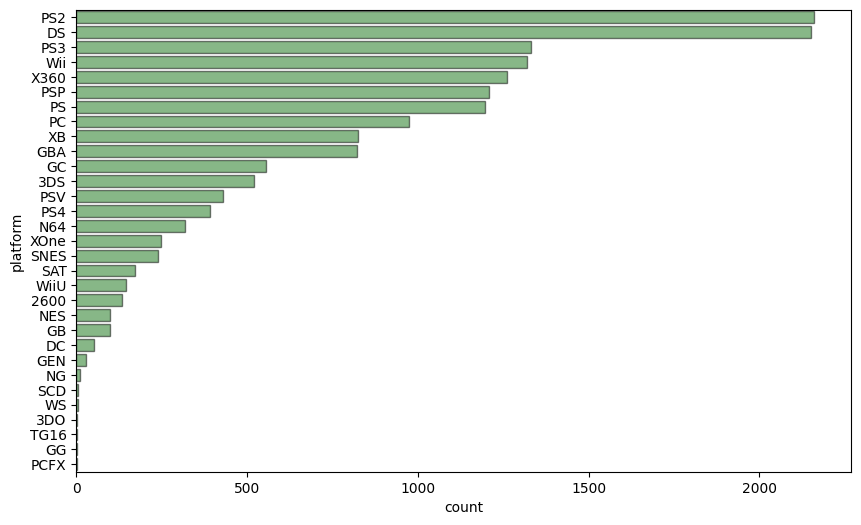

In [159]:
sorted_df = df['platform'].value_counts().reset_index()
sorted_df.columns = ['platform', 'count']
sorted_df = sorted_df.sort_values(by='count', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='count', y='platform', data=sorted_df, color='green', alpha=0.5, edgecolor='black', linewidth=1)
plt.show()

Из графика видно, что самые популярные игровые платформы за весь период это PS2, X360, PS3, WII, DS, PS.

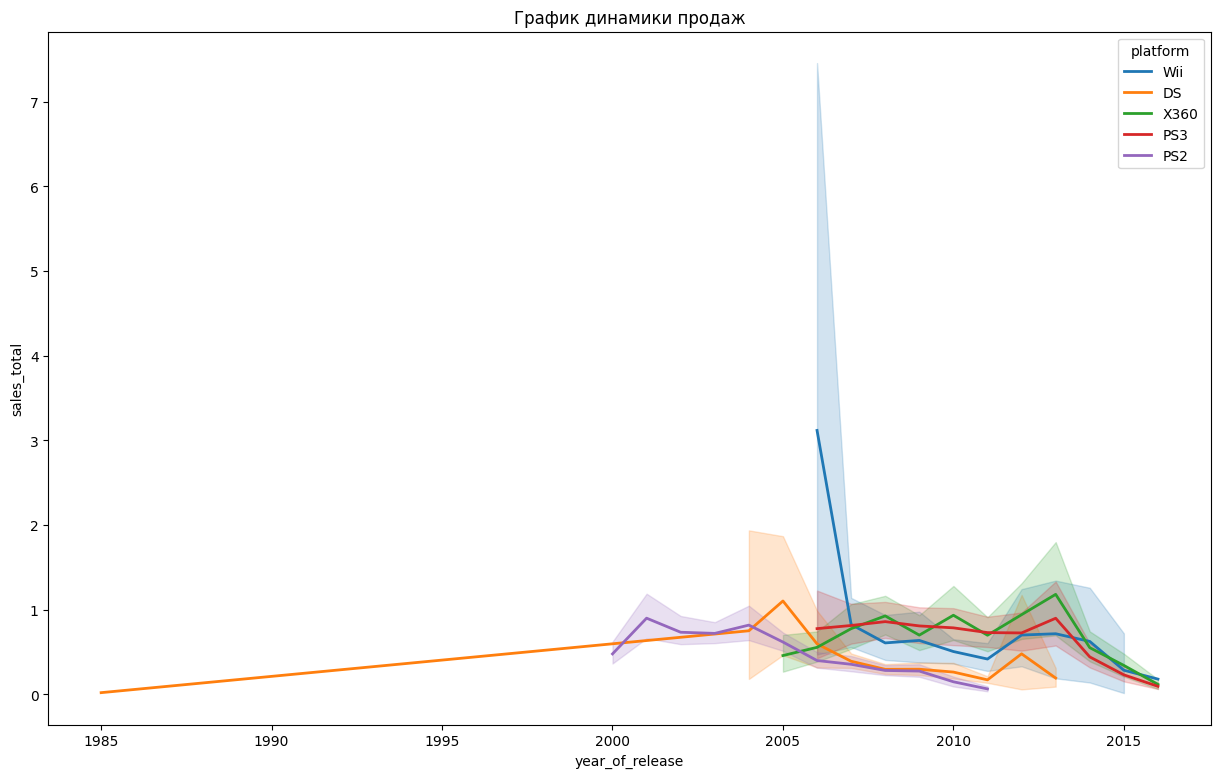

In [180]:
filtered_data = df[df['platform'].isin(['PS2', 'DS', 'PS3', 'Wii', 'X360'])]

plt.figure(figsize=(15, 9))
sns.lineplot(x='year_of_release', y='sales_total', hue='platform', linewidth=2, data=filtered_data, alpha=1, err_style='band')
plt.title('График динамики продаж')
plt.show()